In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager

In [46]:
file_path="D:/study/ml/数据分析资料/数据分析资料/day05/code/starbucks_store_worldwide.csv"
df=pd.read_csv(file_path)
print(df.head(1))
print(df.info())
my_font=font_manager.FontProperties(fname="D:/xiaowei.ttf")

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 


In [47]:
grouped=df.groupby(by="Country")
print(grouped)


In [48]:
#进行遍历
#调用聚合方法
country_count=grouped["Brand"].count()
print(country_count["US"])
print(country_count["CN"])
    

13608
2734


In [49]:

#统计中国每个省份店铺的数量
china_data=df[df["Country"]=="CN"]
grouped2=china_data.groupby(by="State/Province").count()["Brand"]
print(grouped2)

State/Province
11    236
12     58
13     24
14      8
15      8
21     57
22     13
23     16
31    551
32    354
33    315
34     26
35     75
36     13
37     75
41     21
42     76
43     35
44    333
45     21
46     16
50     41
51    104
52      9
53     24
61     42
62      3
63      3
64      2
91    162
92     13
Name: Brand, dtype: int64


In [50]:
#数据按照多个条件分组
grouped3=df[["Brand"]].groupby(by=[df["Country"],df["State/Province"]]).count()
print(grouped3)

                        Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
...                       ...
US      WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]


In [51]:
#索引的方法和属性
print(grouped3.index)

MultiIndex([('AD',  '7'),
            ('AE', 'AJ'),
            ('AE', 'AZ'),
            ('AE', 'DU'),
            ('AE', 'FU'),
            ('AE', 'RK'),
            ('AE', 'SH'),
            ('AE', 'UQ'),
            ('AR',  'B'),
            ('AR',  'C'),
            ...
            ('US', 'UT'),
            ('US', 'VA'),
            ('US', 'VT'),
            ('US', 'WA'),
            ('US', 'WI'),
            ('US', 'WV'),
            ('US', 'WY'),
            ('VN', 'HN'),
            ('VN', 'SG'),
            ('ZA', 'GT')],
           names=['Country', 'State/Province'], length=545)


In [52]:
data1=df.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:10]

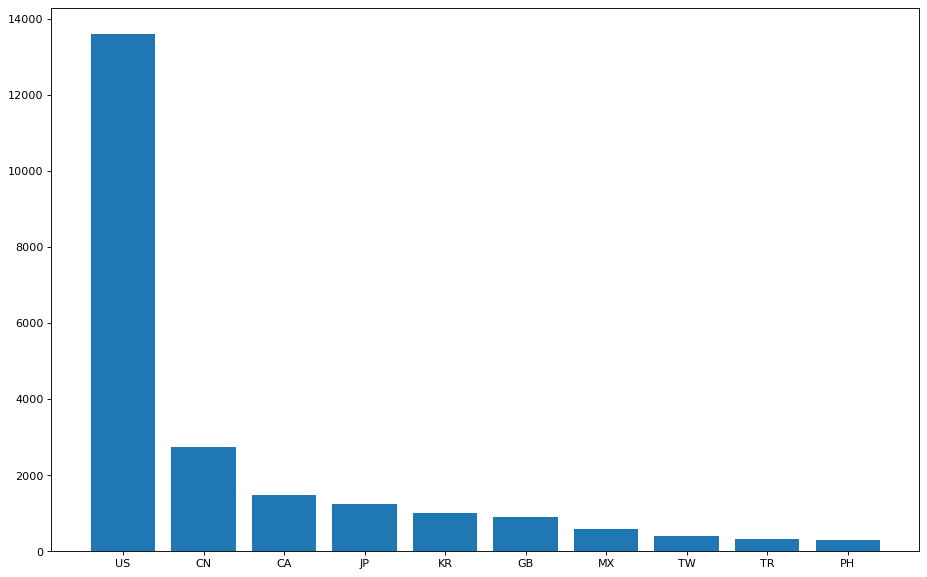

In [53]:
_x=data1.index
_y=data1.values
plt.figure(figsize=(14,9),dpi=80)
plt.bar(range(len(_x)),_y)
plt.xticks(range(len(_x)),_x)
plt.show()

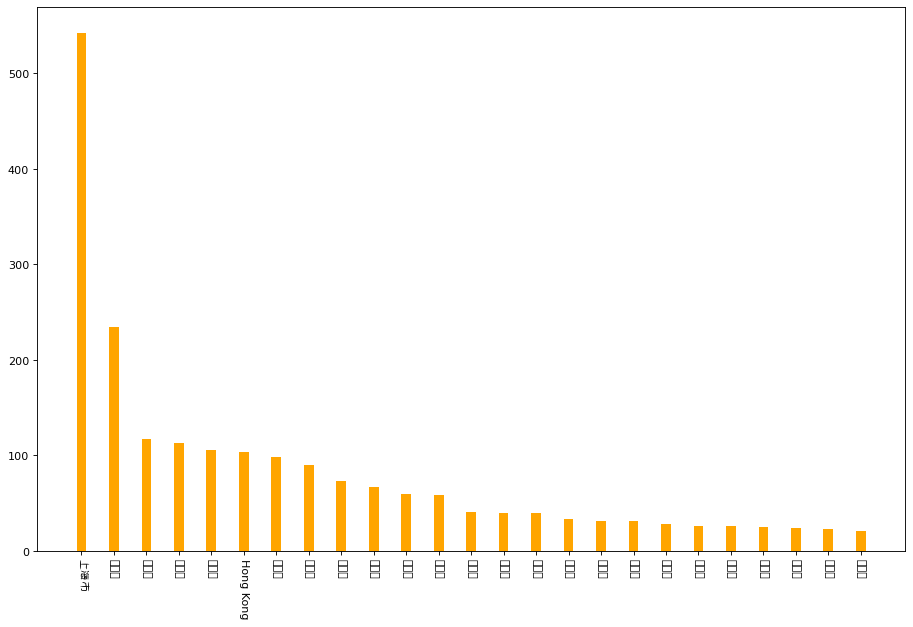

In [56]:
df=df[df["Country"]=="CN"]
data1=df.groupby(by="City").count()["Brand"].sort_values(ascending=False)[:25]
_x=data1.index
_y=data1.values
plt.figure(figsize=(14,9),dpi=80)
plt.bar(range(len(_x)),_y,width=0.3,color="orange")
plt.xticks(range(len(_x)),_x,fontproperties=my_font,rotation=270)
plt.show()

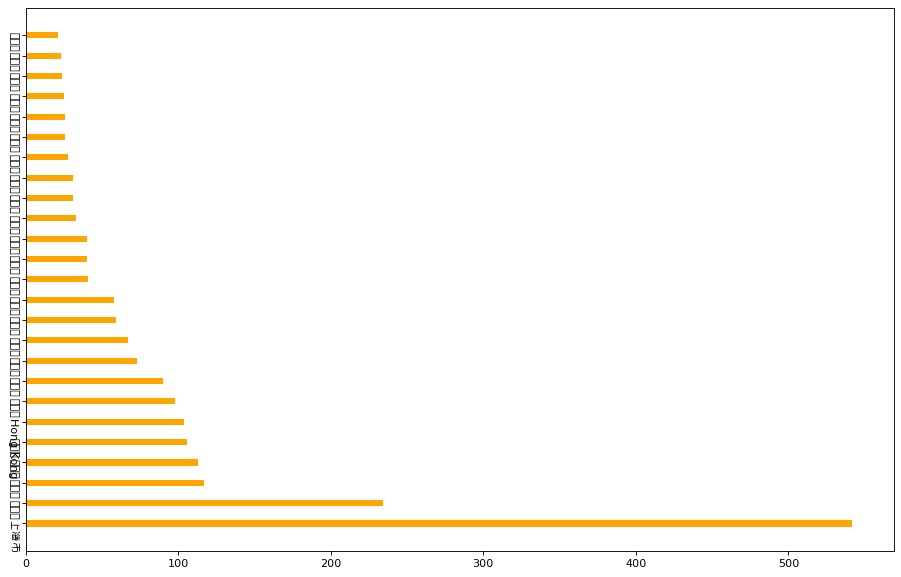

In [57]:
df=df[df["Country"]=="CN"]
data1=df.groupby(by="City").count()["Brand"].sort_values(ascending=False)[:25]
_x=data1.index
_y=data1.values
plt.figure(figsize=(14,9),dpi=80)
plt.barh(range(len(_x)),_y,height=0.3,color="orange")
plt.yticks(range(len(_x)),_x,fontproperties=my_font,rotation=270)
plt.show()